# ITSM - ML

## Problem Statement            

 
Machine learning looks prospective to improve ITSM processes through
prediction and automation. They came up with 4 key areas, where ML can
help ITSM process in ABC Tech.
1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so
that they can take preventive measures or fix the problem before
it surfaces.
2. Forecast the incident volume in different fields , quarterly and
annual. So that they can be better prepared with resources and
technology planning.
3. Auto tag the tickets with right priorities and right departments so
that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure /
misconfiguration of ITSM assets.


## Dataset Information

This dataset encapsulates essential insights within the realm of IT Service Management (ITSM), shedding light on various attributes pivotal for understanding incident handling and resolution processes. With attributes such as Configuration Item Name (CI_Name), Category, Subcategory, Incident ID, Status, and Priority, among others, the dataset offers a comprehensive view of IT service incidents and their management. Each entry corresponds to a distinct IT service incident, making the dataset an invaluable asset for analyzing incident trends, resolution times, and related interactions.

In the context of ABC Tech, A mid-size organisation operation in IT-enabled business segment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

## Attribute Information

CI_Name: Categorical variable representing the name of the configuration item.

CI_Cat: Categorical variable representing the category of the configuration item (e.g., subapplication).

CI_Subcat: Categorical variable representing the subcategory of the configuration item (e.g., Web Based Application).

WBS: Categorical variable representing the Work Breakdown Structure identifier.

Incident_ID: Categorical variable representing the identifier of the incident.

Status: Categorical variable indicating the status of the incident (e.g., Closed).

Impact: Numeric variable representing the impact level of the incident.

Urgency: Numeric variable representing the urgency level of the incident.

Priority: Numeric variable representing the priority level of the incident.

Category: Categorical variable indicating the category of the incident.

KB_number: Categorical variable representing the Knowledge Base article number associated with the incident.

Alert_Status: Categorical variable indicating the status of the alert (e.g., closed).

No_of_Reassignments: Numeric variable representing the number of times the incident was reassigned.

Open_Time: Date and time variable representing the time when the incident was opened.

Reopen_Time: Date and time variable representing the time when the incident was reopened (if applicable).

Resolved_Time: Date and time variable representing the time when the incident was resolved.

Close_Time: Date and time variable representing the time when the incident was closed.

Handle_Time_hrs: Numeric variable representing the total handling time of the incident in hours.

Closure_Code: Categorical variable representing the code used to indicate the reason for closure (e.g., Other).

No_of_Related_Interactions: Numeric variable representing the number of related interactions.

Related_Interaction: Categorical variable representing the identifier of the related interaction.

No_of_Related_Incidents: Numeric variable representing the number of related incidents.

No_of_Related_Changes: Numeric variable representing the number of related changes.

Related_Change: Categorical variable representing the identifier of the related change.

In [104]:
import warnings

warnings.filterwarnings("ignore")

In [1]:
import sweetviz as sv

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
%matplotlib inline

In [4]:
import os

In [5]:
import matplotlib


import sys
import pylab

In [6]:
import pandas as pd
import psycopg2

In [7]:
import sqlalchemy

In [8]:
import pandas as pd
from sqlalchemy import create_engine

host = "18.136.157.135"
port = 3306
user = "dm_team"
password = "DM!$Team@&27920!"

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}")

sql_query = "SHOW DATABASES"


connection = engine.connect()
result = connection.execute(sql_query)

databases = [row[0] for row in result]

print("Available databases:")
print(databases)

connection.close()

Available databases:
['information_schema', 'project_itsm']


In [9]:
database = "project_itsm"  

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

sql_query = "SHOW TABLES"

connection = engine.connect()
result = connection.execute(sql_query)

tables = [row[0] for row in result]

print("Available tables:")
print(tables)

connection.close()

Available tables:
['dataset_list']


In [10]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

sql_query = "SELECT * FROM dataset_list"

df = pd.read_sql_query(sql_query, engine)


In [11]:
new_columns = {
    'columns1': 'CI_Name',
    'columns2': 'CI_Cat',
    'columns3': 'CI_Subcat',
    'columns4': 'WBS',
    'columns5': 'Incident_ID',
    'columns6': 'Status',
    'columns7': 'Impact',
    'columns8': 'Urgency',
    'columns9': 'Priority',
    'columns10': 'Category',
    'columns11': 'KB_number',
    'columns12': 'Alert_Status',
    'columns13': 'No_of_Reassignments',
    'columns14': 'Open_Time',
    'columns15': 'Reopen_Time',
    'columns16': 'Resolved_Time',
    'columns17': 'Close_Time',
    'columns18': 'Handle_Time_hrs',
    'columns19': 'Closure_Code',
    'columns20': 'No_of_Related_Interactions',
    'columns21': 'Related_Interaction',
    'columns22': 'No_of_Related_Incidents',
    'columns23': 'No_of_Related_Changes',
    'columns24': 'Related_Change'
}

In [12]:
df.rename(columns=new_columns, inplace=True)

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


This gives shows the complete dataset with all the values present.

In [15]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


This gives a basic idea of the dataset.

In [16]:
report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [17]:
report.show_html('my_report.html')

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Html report is now generated in new tab and found in folder cointaining jupyter notebook.

The report shows :

1. General Statistics:

Provides summaries of basic data properties like the number of rows and columns, data types used, and missing values overview.

2. Missing Values:

Analyzes missing values, displaying the percentage missing for each column and visualization formats like heatmaps to identify missing value patterns.

3. Feature Distributions:

Shows histograms and other visualizations (e.g., box plots, density plots) for each feature (column) in the DataFrame, helping to understand the distribution of values.

4. Categorical Features:

Specifically analyzes categorical features, displaying frequency tables and bar charts to explore the distribution of different categories and identify potential imbalances.

5. Correlation Matrix:

Visualizes the correlations between all features using a heatmap, providing insights into relationships between different variables.

### Data Pre-processing

In [18]:
print("Data Types of Columns:")
print(df.dtypes)

Data Types of Columns:
CI_Name                       object
CI_Cat                        object
CI_Subcat                     object
WBS                           object
Incident_ID                   object
Status                        object
Impact                        object
Urgency                       object
Priority                      object
number_cnt                    object
Category                      object
KB_number                     object
Alert_Status                  object
No_of_Reassignments           object
Open_Time                     object
Reopen_Time                   object
Resolved_Time                 object
Close_Time                    object
Handle_Time_hrs               object
Closure_Code                  object
No_of_Related_Interactions    object
Related_Interaction           object
No_of_Related_Incidents       object
No_of_Related_Changes         object
Related_Change                object
dtype: object


In [19]:
df_exp = df.copy()

In [20]:
df_exp

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


Dealing NULL value or empty values

In [21]:
columns_with_empty = []

for column in df.columns:
    if df[column].astype(str).str.contains('').any():
        columns_with_empty.append(column)

if columns_with_empty:
    print(f"Columns containing '': {', '.join(columns_with_empty)}")
else:
    print("No columns contain ''.")

Columns containing '': CI_Name, CI_Cat, CI_Subcat, WBS, Incident_ID, Status, Impact, Urgency, Priority, number_cnt, Category, KB_number, Alert_Status, No_of_Reassignments, Open_Time, Reopen_Time, Resolved_Time, Close_Time, Handle_Time_hrs, Closure_Code, No_of_Related_Interactions, Related_Interaction, No_of_Related_Incidents, No_of_Related_Changes, Related_Change


We either drop columns which are not required or replace empty spaces with appropriate value or remove rows which have a empty essential column , we decide column to column basis.

In [22]:
distinct_values = df_exp['CI_Cat'].unique()
print(f"Distinct values of column '{'CI_Cat'}':")
print(distinct_values)

Distinct values of column 'CI_Cat':
['subapplication' 'application' 'computer' '' 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']


In [23]:
df_exp['CI_Cat'].replace('', 'No', inplace=True)

In [24]:
distinct_values = df_exp['CI_Subcat'].unique()
print(f"Distinct values of column '{'CI_Subcat'}':")
print(distinct_values)

Distinct values of column 'CI_Subcat':
['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' '' 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Software' 'Thin Client' 'zOS Cluster' 'Router' 'VMWare'
 'Net Device' 'Neoview Server' 'MQ Queue Manager' 'UPS' 'Number'
 'Iptelephony' 'Windows Server in extern beheer' 'Modem' 'X86 Server'
 'ESX Server' 'Virtual Tape Server' 'IPtelephony' 'NonStop Harddisk'
 'Firewall' 'RAC Service' 'zOS Systeem' 'Instance' 'NonStop Storage'
 'Protocol' 'Tape Library']


In [25]:
df_exp['CI_Subcat'].replace('', 'No', inplace=True)

In [26]:
empty_string_counts = {}

for column_name in df_exp.columns:
    empty_string_count = (df_exp[column_name] == '').sum()
    empty_string_counts[column_name] = empty_string_count

print("Number of empty strings in each column:")
print(empty_string_counts)

Number of empty strings in each column:
{'CI_Name': 0, 'CI_Cat': 0, 'CI_Subcat': 0, 'WBS': 0, 'Incident_ID': 0, 'Status': 0, 'Impact': 0, 'Urgency': 0, 'Priority': 0, 'number_cnt': 0, 'Category': 0, 'KB_number': 0, 'Alert_Status': 0, 'No_of_Reassignments': 1, 'Open_Time': 0, 'Reopen_Time': 44322, 'Resolved_Time': 1780, 'Close_Time': 0, 'Handle_Time_hrs': 1, 'Closure_Code': 460, 'No_of_Related_Interactions': 114, 'Related_Interaction': 0, 'No_of_Related_Incidents': 45384, 'No_of_Related_Changes': 46046, 'Related_Change': 46046}


In [27]:
distinct_values = df_exp['Status'].unique()
print(f"Distinct values of column '{'Status'}':")
print(distinct_values)

Distinct values of column 'Status':
['Closed' 'Work in progress']


In [28]:
df_exp = df_exp[df_exp['No_of_Reassignments'] != '']

In [29]:
df_exp['Reopen_Time'].replace('', 'No', inplace=True)

<ipython-input-29-9baa2ae706ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['Reopen_Time'].replace('', 'No', inplace=True)


In [30]:
df_exp = df_exp[df_exp['Handle_Time_hrs'] != '']

In [31]:
df_exp['No_of_Related_Incidents'].replace('', 0, inplace=True)

In [32]:
df_exp['No_of_Related_Changes'].replace('', 0, inplace=True)

In [33]:
df_exp['Related_Change'].replace('', 0, inplace=True)

In [34]:
df_exp['No_of_Related_Interactions'].replace('', 0, inplace=True)

In [35]:
df_exp['Closure_Code'].replace('', 'No', inplace=True)

In [36]:
df_exp['Resolved_Time'].replace('', 'No', inplace=True)

In [37]:
empty_string_counts = {}

for column_name in df_exp.columns:
    empty_string_count = (df_exp[column_name] == '').sum()
    empty_string_counts[column_name] = empty_string_count

print("Number of empty strings in each column:")
print(empty_string_counts)

Number of empty strings in each column:
{'CI_Name': 0, 'CI_Cat': 0, 'CI_Subcat': 0, 'WBS': 0, 'Incident_ID': 0, 'Status': 0, 'Impact': 0, 'Urgency': 0, 'Priority': 0, 'number_cnt': 0, 'Category': 0, 'KB_number': 0, 'Alert_Status': 0, 'No_of_Reassignments': 0, 'Open_Time': 0, 'Reopen_Time': 0, 'Resolved_Time': 0, 'Close_Time': 0, 'Handle_Time_hrs': 0, 'Closure_Code': 0, 'No_of_Related_Interactions': 0, 'Related_Interaction': 0, 'No_of_Related_Incidents': 0, 'No_of_Related_Changes': 0, 'Related_Change': 0}


Deleting or modifications of columns 

In [38]:
df_exp.drop('Incident_ID', axis=1, inplace=True)

In [39]:
df_exp.drop('Open_Time', axis=1, inplace=True)

In [40]:
df_exp.drop('Close_Time', axis=1, inplace=True)

In [41]:
df_exp.drop('Resolved_Time', axis=1, inplace=True)   

In [42]:
df_exp.drop('number_cnt', axis=1, inplace=True)  

In [43]:
df_exp.drop('Alert_Status', axis=1, inplace=True)

Modifying each column so it can be used for machine learning

In [44]:
df_exp['CI_Name'] = pd.factorize(df_exp['CI_Name'])[0]

In [45]:
df_exp['CI_Cat'].replace('No', np.nan, inplace=True)


factorized_values, unique_values = pd.factorize(df_exp['CI_Cat'])

df_exp['CI_Cat'] = np.where(pd.isnull(df_exp['CI_Cat']), 0, factorized_values + 1)

In [46]:
df_exp['CI_Subcat'].replace('No', np.nan, inplace=True)


factorized_values, unique_values = pd.factorize(df_exp['CI_Subcat'])

df_exp['CI_Subcat'] = np.where(pd.isnull(df_exp['CI_Subcat']), 0, factorized_values + 1)

In [47]:
df_exp['WBS'] = pd.factorize(df_exp['WBS'])[0]

In [48]:
status_mapping = {'Closed': 1, 'Work in progress': 0}
df_exp['Status'] = df_exp['Status'].map(status_mapping)

In [49]:
df_exp['Impact'] = df_exp['Impact'].replace('NS', 0)

In [50]:
df_exp['Urgency'] = df_exp['Urgency'].replace('5 - Very Low', 5)

In [51]:
df_exp['Priority'] = df_exp['Priority'].replace('NA', 6)

In [52]:
status_mapping = {'incident': 1, 'request for information': 2, 'complaint': 3}
df_exp['Category'] = df_exp['Category'].map(status_mapping)

In [53]:
df_exp['KB_number'] = pd.factorize(df_exp['KB_number'])[0]

In [54]:
df_exp['No_of_Reassignments'] = pd.to_numeric(df_exp['No_of_Reassignments'], errors='coerce')

In [55]:
df_exp['Status'] = pd.to_numeric(df_exp['Status'], errors='coerce')
df_exp['Impact'] = pd.to_numeric(df_exp['Impact'], errors='coerce')
df_exp['Urgency'] = pd.to_numeric(df_exp['Urgency'], errors='coerce')
df_exp['Priority'] = pd.to_numeric(df_exp['Priority'], errors='coerce')

In [56]:
df_exp.rename(columns={'Reopen_Time': 'Reopen'}, inplace=True)

df_exp['Reopen'] = df_exp['Reopen'].replace({'No': 1}).map(lambda x: 0 if x != 1 else 1)

In [57]:
import re

def replace_commas(value):
    
    replaced_value = re.sub(r'0,(?=\d)', '0.', value)
    
    replaced_value = re.sub(r',', '', replaced_value)
    return replaced_value

df_exp['Handle_Time_hrs'] = df_exp['Handle_Time_hrs'].apply(replace_commas)

In [58]:
df_exp['Handle_Time_hrs'] = pd.to_numeric(df_exp['Handle_Time_hrs'], errors='coerce', downcast='float')

In [59]:
df_exp['Closure_Code'].replace('No', np.nan, inplace=True)


factorized_values, unique_values = pd.factorize(df_exp['Closure_Code'])

df_exp['Closure_Code'] = np.where(pd.isnull(df_exp['Closure_Code']), 0, factorized_values + 1)

In [60]:
df_exp['No_of_Related_Interactions'] = pd.to_numeric(df_exp['No_of_Related_Interactions'], errors='coerce')

In [61]:
replace_dict = {'#MULTIVALUE': 1, '#N/B': 2}

df_exp['Related_Interaction'] = df_exp['Related_Interaction'].replace(replace_dict)

df_exp['Related_Interaction'] = df_exp['Related_Interaction'].map(lambda x: 0 if x not in replace_dict.values() else x).astype(int)

In [62]:
df_exp['No_of_Related_Incidents'] = pd.to_numeric(df_exp['No_of_Related_Incidents'], errors='coerce')

In [63]:
df_exp['No_of_Related_Changes'] = pd.to_numeric(df_exp['No_of_Related_Changes'], errors='coerce')

In [64]:
factorized_values, unique_values = pd.factorize(df_exp['Related_Change'].replace({0: pd.NA}))  
df_exp['Related_Change'] = factorized_values + 1  
df_exp['Related_Change'].fillna(0, inplace=True)

In [65]:
df_exp.dtypes

CI_Name                         int64
CI_Cat                          int64
CI_Subcat                       int64
WBS                             int64
Status                          int64
Impact                          int64
Urgency                         int64
Priority                        int64
Category                        int64
KB_number                       int64
No_of_Reassignments             int64
Reopen                          int64
Handle_Time_hrs               float64
Closure_Code                    int64
No_of_Related_Interactions      int64
Related_Interaction             int32
No_of_Related_Incidents         int64
No_of_Related_Changes           int64
Related_Change                  int64
dtype: object

In [66]:
nan_count = df_exp['Handle_Time_hrs'].isna().sum()

print("Number of NaN values in 'Column_Name':", nan_count)

Number of NaN values in 'Column_Name': 276


In [67]:
df_exp = df_exp.dropna()

##  1.Predicting High Priority Tickets

In [68]:
df1 = df_exp.copy()

In [69]:
df_extra = df_exp.copy()

### Filter for only priority as 1 and 2

In [70]:
df2 = df1[df1['Priority'].isin([1, 2])]

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

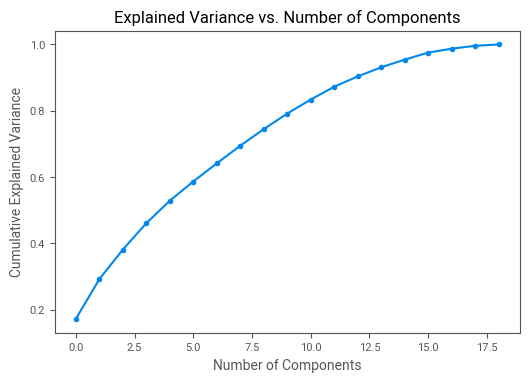

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)


pca = PCA()
pca.fit(df_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [73]:
threshold = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain: {num_components}")

Number of components to retain: 15


In [74]:
df_pca = df2.copy()

In [75]:
X = df2.iloc[:, :7]  
X = pd.concat([X, df2.iloc[:, 8:]], axis=1)  
y = df2.iloc[:, 7]

In [76]:
ss = StandardScaler()
X_pca = df_pca.iloc[:,:7]
X_pca = pd.concat([X, df_pca.iloc[:, 8:]], axis=1)
X_pca = pd.DataFrame(data=ss.fit_transform(X_pca), columns=X_pca.columns)          

In [77]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_pca)
cols = [f'PC{i}' for i in range(1,16)]
X_pca = pd.DataFrame(data=X_pca, columns=cols)
X_pca.shape

(692, 15)

 Splitting the data

In [78]:
X = df2.iloc[:, :7]  
X = pd.concat([X, df2.iloc[:, 8:]], axis=1)  
y = df2.iloc[:, 7]

X_pca = df_pca.iloc[:, :7]  
X_pca = pd.concat([X, df_pca.iloc[:, 8:]], axis=1)  
y_pca = df_pca.iloc[:, 7]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

Splitted the data into 80:20 ratio

### Model Building

In [80]:
from sklearn.cluster import KMeans

data = df2

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
max_k = 20

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)  


In [81]:
elbow_index = distortions.index(min(distortions))

optimal_k = elbow_index + 1

print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 20


In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [83]:
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
mlp = MLPClassifier()
kmeans = KMeans(n_clusters=20)

### Model training and testing

In [84]:
l = [knn, svc, nb, dt, rf, lr, gb, mlp, kmeans]
d = []
tt = []
verbose = 1 
for x in l:
    t0=time.time()
    x.fit(X_train,y_train)
    t1=time.time()
    train_preds = x.predict(X_train)
    t2=time.time()
    test_preds = x.predict(X_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_train, train_preds)*100).round(2), 'Train', 'No'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_test, test_preds)*100).round(2), 'Test', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'No'])
    
    t0=time.time()
    x.fit(Xpca_train,ypca_train)
    t1=time.time()
    train_preds_pca = x.predict(Xpca_train)
    t2=time.time()
    test_preds_pca = x.predict(Xpca_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_train, train_preds_pca)*100).round(2), 'Train', 'Yes'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_test, test_preds_pca)*100).round(2), 'Test', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'Yes'])
    if verbose:
        print(str(x)[:str(x).index('(')])
        print('Manual Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(y_train, train_preds))
        print(confusion_matrix(y_train, train_preds),'\n')
        print('\nTest Set\n')
        print(classification_report(y_test, test_preds))
        print(confusion_matrix(y_test, test_preds),'\n')
        print('PCA Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(ypca_train, train_preds_pca))
        print(confusion_matrix(ypca_train, train_preds_pca),'\n')
        print('\nTest Set\n')
        print(classification_report(ypca_test, test_preds_pca))
        print(confusion_matrix(ypca_test, test_preds_pca),'\n')
        print('--x--x--x--x--x--x--x--x--x--x--x--x--x--\n\n')

KNeighborsClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.99      1.00      1.00       550

    accuracy                           0.99       553
   macro avg       0.50      0.50      0.50       553
weighted avg       0.99      0.99      0.99       553

[[  0   3]
 [  0 550]] 


Test Set

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       139

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

[[139]] 

PCA Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.99      1.00      1.00       550

    accuracy                           0.99       553
   macro avg       0.50      0

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       550

    accuracy                           1.00       553
   macro avg       1.00      1.00      1.00       553
weighted avg       1.00      1.00      1.00       553

[[  3   0]
 [  0 550]] 


Test Set

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       139

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

[[139]] 

PCA Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       550

    accuracy                           1.00       553
   macro avg       1.00      1.00      1.00       553
weighted avg       1.00      1.00      1.

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

GradientBoostingClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       550

    accuracy                           1.00       553
   macro avg       1.00      1.00      1.00       553
weighted avg       1.00      1.00      1.00       553

[[  3   0]
 [  0 550]] 


Test Set

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       139

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

[[139]] 

PCA Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       550

    accuracy                           1.00       553
   macro avg       1.00 

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

KMeans
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.33      0.01         3
           2       1.00      0.05      0.10       550
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334:

In [98]:
comp = pd.DataFrame(data=d, columns=['Model', 'Accuracy','Type', 'PCA?'])
comp

,Model,Accuracy,Type,PCA?
0,KNeighborsClassifier,99.46,Train,No
1,KNeighborsClassifier,100.00,Test,No
2,KNeighborsClassifier,99.46,Train,Yes
3,KNeighborsClassifier,100.00,Test,Yes
4,SVC,99.46,Train,No
5,SVC,100.00,Test,No
6,SVC,99.46,Train,Yes
7,SVC,100.00,Test,Yes
8,GaussianNB,99.46,Train,No
9,GaussianNB,100.00,Test,No


Based on above confusion matrix,classification report and accuracy values : Random Forest Classifier is the best model for predicting tickets priority 1 or 2.

#### In conclusion, we can use random forest classifer model to predict tickets priority 1 or 2 the best.

##  2.Predicting incident volume

### Preprocess the data

In [145]:
df6 = df.copy()

In [146]:
incfrq = df6.loc[:,['Incident_ID','Open_Time']]

In [147]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


### Data Processing / Data Munging

In [150]:
import datetime as dt

for i in range(len(incfrq.Open_Time)):
    if len(incfrq.Open_Time[i]) > 10 and incfrq.Open_Time[i][2] == '/':
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif len(incfrq.Open_Time[i]) > 10 and incfrq.Open_Time[i][1] == '/':
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [151]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [152]:
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')

In [153]:
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [154]:
incfrq.head(3)

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1


In [155]:
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [156]:
incfrq.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [157]:
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [158]:
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [159]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

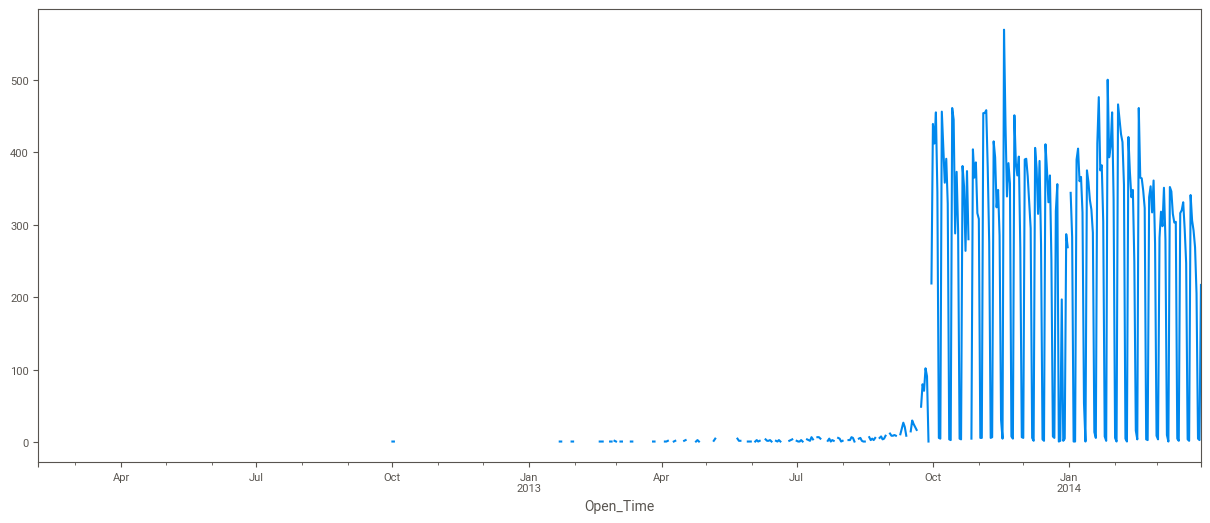

In [160]:
data1.plot(figsize=(15,6))
plt.show()

In [161]:
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [162]:
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [163]:
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

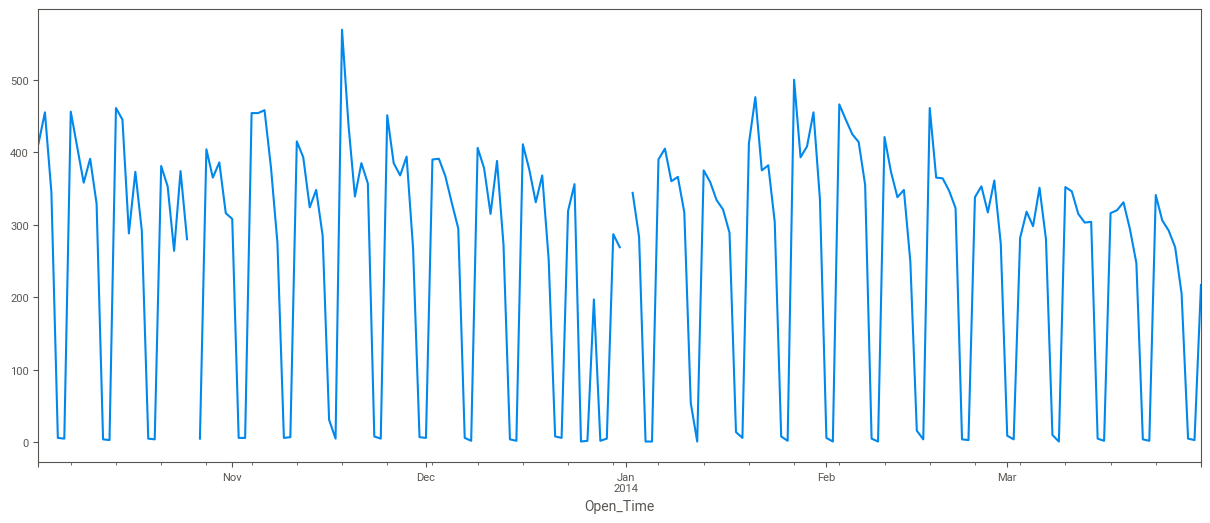

In [164]:
data2.plot(figsize=(15,6))
plt.show()

In [166]:
import itertools
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [168]:
import statsmodels.api as sm
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472276
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363338230985
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.312508693354
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.4315812436344


In [169]:
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.685      2.576      0.010    6023.606    4.44e+04


In [170]:
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

### Visualization

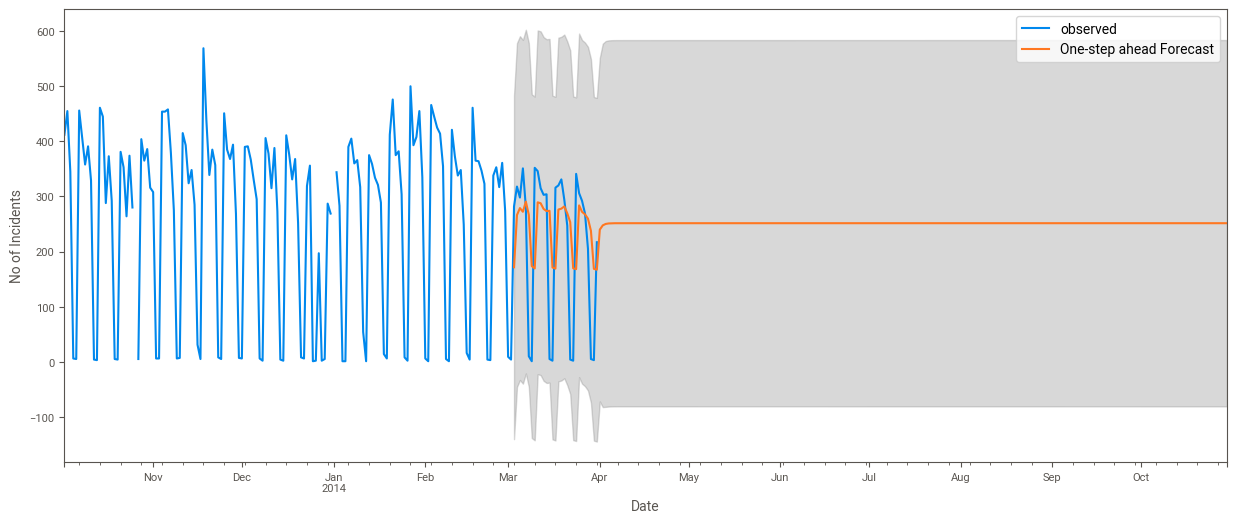

In [171]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

##  3.  Tagging tickets with right priorities and right departments

### Finding best model for priority

In [85]:
df3 = df_extra.copy()

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

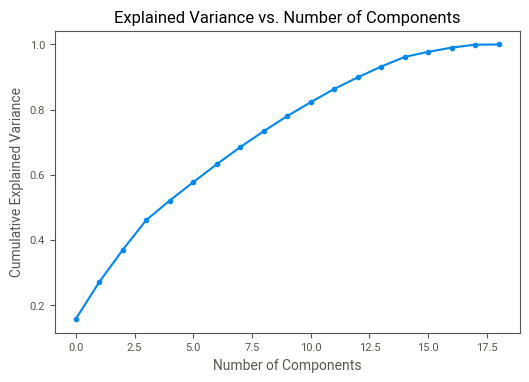

In [87]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df3)


pca = PCA()
pca.fit(df_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [88]:
threshold = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain: {num_components}")

Number of components to retain: 15


In [89]:
df_pca = df3.copy()

In [90]:
X = df3.iloc[:, :7]  
X = pd.concat([X, df3.iloc[:, 8:]], axis=1)  
y = df3.iloc[:, 7]

In [91]:
ss = StandardScaler()
X_pca = df_pca.iloc[:,:7]
X_pca = pd.concat([X, df_pca.iloc[:, 8:]], axis=1)
X_pca = pd.DataFrame(data=ss.fit_transform(X_pca), columns=X_pca.columns)          

In [92]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_pca)
cols = [f'PC{i}' for i in range(1,16)]
X_pca = pd.DataFrame(data=X_pca, columns=cols)
X_pca.shape

(46329, 15)

 Splitting the data

In [93]:
X = df3.iloc[:, :7]  
X = pd.concat([X, df3.iloc[:, 8:]], axis=1)  
y = df3.iloc[:, 7]

X_pca = df_pca.iloc[:, :7]  
X_pca = pd.concat([X, df_pca.iloc[:, 8:]], axis=1)  
y_pca = df_pca.iloc[:, 7]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

Splitted the data into 80:20 ratio

### Model Building

In [95]:
from sklearn.cluster import KMeans

data = df3

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
max_k = 20

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)  


In [96]:
elbow_index = distortions.index(min(distortions))

optimal_k = elbow_index + 1

print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 20


In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [98]:
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
mlp = MLPClassifier()
kmeans = KMeans(n_clusters=20)

### Model training and testing

In [100]:
l = [knn, svc, nb, dt, rf, lr, gb, mlp, kmeans]
d = []
tt = []
verbose = 1 
for x in l:
    t0=time.time()
    x.fit(X_train,y_train)
    t1=time.time()
    train_preds = x.predict(X_train)
    t2=time.time()
    test_preds = x.predict(X_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_train, train_preds)*100).round(2), 'Train', 'No'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_test, test_preds)*100).round(2), 'Test', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'No'])
    
    t0=time.time()
    x.fit(Xpca_train,ypca_train)
    t1=time.time()
    train_preds_pca = x.predict(Xpca_train)
    t2=time.time()
    test_preds_pca = x.predict(Xpca_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_train, train_preds_pca)*100).round(2), 'Train', 'Yes'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_test, test_preds_pca)*100).round(2), 'Test', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'Yes'])
    if verbose:
        print(str(x)[:str(x).index('(')])
        print('Manual Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(y_train, train_preds))
        print(confusion_matrix(y_train, train_preds),'\n')
        print('\nTest Set\n')
        print(classification_report(y_test, test_preds))
        print(confusion_matrix(y_test, test_preds),'\n')
        print('PCA Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(ypca_train, train_preds_pca))
        print(confusion_matrix(ypca_train, train_preds_pca),'\n')
        print('\nTest Set\n')
        print(classification_report(ypca_test, test_preds_pca))
        print(confusion_matrix(ypca_test, test_preds_pca),'\n')
        print('--x--x--x--x--x--x--x--x--x--x--x--x--x--\n\n')

KNeighborsClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.51      0.22      0.31       567
           3       0.68      0.55      0.61      4225
           4       0.70      0.85      0.77     18031
           5       0.73      0.63      0.68     13126
           6       0.94      0.32      0.48      1111

    accuracy                           0.71     37063
   macro avg       0.59      0.43      0.47     37063
weighted avg       0.72      0.71      0.70     37063

[[    0     0     0     3     0     0]
 [    0   125    46   258   135     3]
 [    0    32  2318  1341   521    13]
 [    0    46   483 15301  2198     3]
 [    0    28   410  4416  8269     3]
 [    0    14   145   419   179   354]] 


Test Set

              precision    recall  f1-score   support

           2       0.27      0.11      0.15       122
           3       0.54      0.42  

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.51      0.22      0.31       567
           3       0.68      0.55      0.61      4225
           4       0.70      0.85      0.77     18031
           5       0.73      0.63      0.68     13126
           6       0.94      0.32      0.47      1111

    accuracy                           0.71     37063
   macro avg       0.60      0.43      0.47     37063
weighted avg       0.71      0.71      0.70     37063

[[    0     0     0     3     0     0]
 [    0   126    40   260   137     4]
 [    0    31  2322  1347   514    11]
 [    0    42   488 15264  2235     2]
 [    0    30   402  4421  8269     4]
 [    1    17   147   423   173   350]] 


Test Set

              precision    recall  f1-score   support

           2       0.26      0.11      0.16       122
           3       0.55      0.42      0.47      1075
           4       0.61      0.73      0.66   

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

[[    0     0     0     3     0     0]
 [    0     0     0   567     0     0]
 [    0     0     0  4225     0     0]
 [    0     0     0 18031     0     0]
 [    0     0     0 13126     0     0]
 [    0     0     0  1111     0     0]] 


Test Set

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00      1075
           4       0.49      1.00      0.66      4547
           5       0.00      0.00      0.00      3257
           6       0.00      0.00      0.00       265

    accuracy                           0.49      9266
   macro avg       0.10      0.20      0.13      9266
weighted avg       0.24      0.49      0.32      9266

[[   0    0  122    0    0]
 [   0    0 1075    0    0]
 [   0    0 4547    0    0]
 [   0    0 3257    0    0]
 [   0    0  265    0    0]] 

--x--x--x--x--x--x--x--x--x--x--x--x--x--




c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GaussianNB
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00       567
           3       0.00      0.00      0.00      4225
           4       0.49      0.98      0.65     18031
           5       0.42      0.03      0.05     13126
           6       0.00      0.00      0.00      1111

    accuracy                           0.49     37063
   macro avg       0.15      0.17      0.12     37063
weighted avg       0.39      0.49      0.33     37063

[[    0     0     0     3     0     0]
 [    0     0     0   563     4     0]
 [    0     0     0  4155    70     0]
 [    0     0     0 17614   417     0]
 [    0     0     0 12757   369     0]
 [    0     0     0  1089    22     0]] 


Test Set

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00  

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

[[    0     0     0     3     0     0]
 [    0     0     0   538    29     0]
 [    0     0     0  3995   230     0]
 [    0     0     0 16749  1282     0]
 [    0     0     0 12087  1039     0]
 [    0     0     0  1041    70     0]] 


Test Set

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00      1075
           4       0.49      0.93      0.64      4547
           5       0.38      0.07      0.12      3257
           6       0.00      0.00      0.00       265

    accuracy                           0.48      9266
   macro avg       0.17      0.20      0.15      9266
weighted avg       0.37      0.48      0.36      9266

[[   0    0  115    7    0]
 [   0    0 1013   62    0]
 [   0    0 4236  311    0]
 [   0    0 3015  242    0]
 [   0    0  250   15    0]] 

--x--x--x--x--x--x--x--x--x--x--x--x--x--




c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       567
           3       1.00      1.00      1.00      4225
           4       1.00      1.00      1.00     18031
           5       1.00      1.00      1.00     13126
           6       1.00      1.00      1.00      1111

    accuracy                           1.00     37063
   macro avg       1.00      1.00      1.00     37063
weighted avg       1.00      1.00      1.00     37063

[[    3     0     0     0     0     0]
 [    0   567     0     0     0     0]
 [    0     0  4225     0     0     0]
 [    0     0     0 18031     0     0]
 [    0     0     0     0 13126     0]
 [    0     0     0     0     0  1111]] 


Test Set

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       122
           3       1.00      1.00

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       122
           3       0.00      0.00      0.00      1075
           4       0.49      1.00      0.66      4547
           5       0.96      0.01      0.01      3257
           6       0.00      0.00      0.00       265

    accuracy                           0.49      9266
   macro avg       0.29      0.20      0.13      9266
weighted avg       0.58      0.49      0.33      9266

[[   0    0  122    0    0]
 [   0    0 1075    0    0]
 [   0    0 4547    0    0]
 [   0    0 3234   23    0]
 [   0    0  264    1    0]] 

--x--x--x--x--x--x--x--x--x--x--x--x--x--


GradientBoostingClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00       567
           3       1.00      1.00      1.00      4225
           4       1.00      1.00   

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\

[[    0     0     0     3     0     0]
 [    0    24   115   370    57     1]
 [    0    52  1591  2363   219     0]
 [    0    49   670 16439   873     0]
 [    0    53   588  9569  2916     0]
 [    0    27   414   560    42    68]] 


Test Set

              precision    recall  f1-score   support

           2       0.07      0.03      0.04       122
           3       0.48      0.38      0.42      1075
           4       0.57      0.91      0.70      4547
           5       0.73      0.23      0.35      3257
           6       1.00      0.03      0.07       265

    accuracy                           0.57      9266
   macro avg       0.57      0.32      0.32      9266
weighted avg       0.62      0.57      0.52      9266

[[   4   23   88    7    0]
 [  15  407  586   67    0]
 [  18  190 4139  200    0]
 [  12  140 2349  756    0]
 [  11   95  138   12    9]] 

--x--x--x--x--x--x--x--x--x--x--x--x--x--


KMeans
Manual Dimensionality Reduction

Train Set

              precision  

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334:

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   9    0   44    3    5    5    4    0    6    5    3    2    5    5
     0    7    2    2    6    9]
 [  39    8  624   18   16   45   18   17   29   14   18   19   28   72
     5   23   19    9   28   26]
 [ 168   62 2040  118  125  253   50   57  215   98   63   93  137  367
    45  239   78   65  151  123]
 [ 137   44 1400   97  105  167   53   45  151  105   47   65  115  203
    49  144   67   45  128   90]
 [   5    4  149    6    4    9    5    2   10    6    2    4    7   20
     2   13    6    4    6    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    

c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334:

In [101]:
comp = pd.DataFrame(data=d, columns=['Model', 'Accuracy','Type', 'PCA?'])
comp

,Model,Accuracy,Type,PCA?
0,KNeighborsClassifier,71.14,Train,No
1,KNeighborsClassifier,58.48,Test,No
2,KNeighborsClassifier,71.04,Train,Yes
3,KNeighborsClassifier,58.39,Test,Yes
4,SVC,48.65,Train,No
5,SVC,49.07,Test,No
6,SVC,48.65,Train,Yes
7,SVC,49.07,Test,Yes
8,GaussianNB,48.52,Train,No
9,GaussianNB,49.00,Test,No


Based on above confusion matrix,classification report and accuracy values : Random Forest Classifier is the best model for predicting tickets priority.

### Finding best model for department

In [105]:
df4 = df_extra.copy()

In [106]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

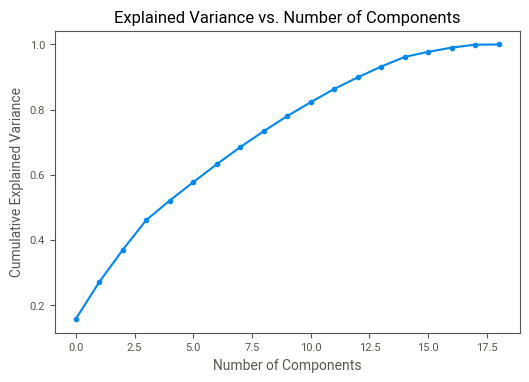

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df4)


pca = PCA()
pca.fit(df_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [108]:
threshold = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain: {num_components}")

Number of components to retain: 15


In [109]:
df_pca = df4.copy()

In [110]:
X = df4.iloc[:, :1]  
X = pd.concat([X, df4.iloc[:, 2:]], axis=1)  
y = df4.iloc[:, 1]

In [111]:
ss = StandardScaler()
X_pca = df_pca.iloc[:,:1]
X_pca = pd.concat([X, df_pca.iloc[:, 2:]], axis=1)
X_pca = pd.DataFrame(data=ss.fit_transform(X_pca), columns=X_pca.columns)          

In [112]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_pca)
cols = [f'PC{i}' for i in range(1,16)]
X_pca = pd.DataFrame(data=X_pca, columns=cols)
X_pca.shape

(46329, 15)

 Splitting the data

In [113]:
X = df4.iloc[:, :1]  
X = pd.concat([X, df4.iloc[:, 2:]], axis=1)  
y = df4.iloc[:, 1]

X_pca = df_pca.iloc[:, :1]  
X_pca = pd.concat([X, df_pca.iloc[:, 2:]], axis=1)  
y_pca = df_pca.iloc[:, 1]

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

Splitted the data into 80:20 ratio

### Model Building

In [115]:
from sklearn.cluster import KMeans

data = df4

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
max_k = 20

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)  


In [116]:
elbow_index = distortions.index(min(distortions))

optimal_k = elbow_index + 1

print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 20


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [118]:
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
mlp = MLPClassifier()
kmeans = KMeans(n_clusters=20)

### Model training and testing

In [119]:
l = [knn, svc, nb, dt, rf, lr, gb, mlp, kmeans]
d = []
tt = []
verbose = 1 
for x in l:
    t0=time.time()
    x.fit(X_train,y_train)
    t1=time.time()
    train_preds = x.predict(X_train)
    t2=time.time()
    test_preds = x.predict(X_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_train, train_preds)*100).round(2), 'Train', 'No'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_test, test_preds)*100).round(2), 'Test', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'No'])
    
    t0=time.time()
    x.fit(Xpca_train,ypca_train)
    t1=time.time()
    train_preds_pca = x.predict(Xpca_train)
    t2=time.time()
    test_preds_pca = x.predict(Xpca_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_train, train_preds_pca)*100).round(2), 'Train', 'Yes'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_test, test_preds_pca)*100).round(2), 'Test', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'Yes'])
    if verbose:
        print(str(x)[:str(x).index('(')])
        print('Manual Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(y_train, train_preds))
        print(confusion_matrix(y_train, train_preds),'\n')
        print('\nTest Set\n')
        print(classification_report(y_test, test_preds))
        print(confusion_matrix(y_test, test_preds),'\n')
        print('PCA Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(ypca_train, train_preds_pca))
        print(confusion_matrix(ypca_train, train_preds_pca),'\n')
        print('\nTest Set\n')
        print(classification_report(ypca_test, test_preds_pca))
        print(confusion_matrix(ypca_test, test_preds_pca),'\n')
        print('--x--x--x--x--x--x--x--x--x--x--x--x--x--\n\n')

KNeighborsClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.68      0.30      0.41        91
           1       0.75      0.52      0.61      6141
           2       0.82      0.97      0.89     26249
           3       0.80      0.31      0.45      2873
           4       0.85      0.14      0.24       168
           5       0.85      0.33      0.47       257
           6       0.79      0.30      0.44       552
           7       0.93      0.34      0.50       168
           8       0.91      0.50      0.64       349
           9       0.91      0.40      0.55       124
          10       0.75      0.07      0.13        86
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2

    accuracy                           0.81     37063
   macro avg       0.69      0.32      0.41     37063
weighted avg       0.81      0.81      0.79     37063

[[   27     8 

[[    0     0    91     0     0     0     0     0     0     0     0     0
      0]
 [    0     0  6141     0     0     0     0     0     0     0     0     0
      0]
 [    0     0 26249     0     0     0     0     0     0     0     0     0
      0]
 [    0     0  2873     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   168     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   257     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   552     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   168     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   349     0     0     0     0     0     0     0     0     0
      0]
 [    0     0   124     0     0     0     0     0     0     0     0     0
      0]
 [    0     0    86     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     3     0     0     0     0     0     0     0     0     0
      0]
 [  

DecisionTreeClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00      6141
           2       1.00      1.00      1.00     26249
           3       1.00      1.00      1.00      2873
           4       1.00      1.00      1.00       168
           5       1.00      1.00      1.00       257
           6       1.00      1.00      1.00       552
           7       1.00      1.00      1.00       168
           8       1.00      1.00      1.00       349
           9       1.00      1.00      1.00       124
          10       1.00      1.00      1.00        86
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         2

    accuracy                           1.00     37063
   macro avg       1.00      1.00      1.00     37063
weighted avg       1.00      1.00      1.00     37063

[[   91     

LogisticRegression
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.00      0.00      0.00      6141
           2       0.71      1.00      0.83     26249
           3       0.66      0.08      0.15      2873
           4       0.00      0.00      0.00       168
           5       0.00      0.00      0.00       257
           6       0.00      0.00      0.00       552
           7       0.00      0.00      0.00       168
           8       0.00      0.00      0.00       349
           9       0.00      0.00      0.00       124
          10       0.00      0.00      0.00        86
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2

    accuracy                           0.71     37063
   macro avg       0.11      0.08      0.08     37063
weighted avg       0.56      0.71      0.60     37063

[[    0     0   

[[   91     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0  5961   180     0     0     0     0     0     0     0     0     0
      0]
 [    0    30 26219     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0  2873     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0   168     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0   256     0     0     0     0     1     0
      0]
 [    0     0     0     0     0     0   552     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0   168     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0   349     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0   124     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0    86     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     3
      0]
 [  

KMeans
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.00      0.02      0.00        91
           1       0.15      0.01      0.03      6141
           2       0.70      0.45      0.55     26249
           3       0.09      0.04      0.05      2873
           4       0.00      0.01      0.01       168
           5       0.01      0.03      0.01       257
           6       0.01      0.04      0.02       552
           7       0.00      0.00      0.00       168
           8       0.00      0.01      0.01       349
           9       0.00      0.01      0.00       124
          10       0.00      0.01      0.00        86
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0

In [120]:
comp = pd.DataFrame(data=d, columns=['Model', 'Accuracy','Type', 'PCA?'])
comp

,Model,Accuracy,Type,PCA?
0,KNeighborsClassifier,80.97,Train,No
1,KNeighborsClassifier,75.69,Test,No
2,KNeighborsClassifier,80.95,Train,Yes
3,KNeighborsClassifier,75.53,Test,Yes
4,SVC,70.82,Train,No
5,SVC,69.51,Test,No
6,SVC,70.82,Train,Yes
7,SVC,69.51,Test,Yes
8,GaussianNB,70.82,Train,No
9,GaussianNB,69.51,Test,No


Based on above confusion matrix,classification report and accuracy values : Random Forest Classifier is the best model for predicting tickets department.

#### In conclusion, we can use random forest classifer model to tag the priotity and department for the data.

##  4.  Predict RFC (Request for change)

In [124]:
df5 = df_extra.copy()

In [125]:
df5['Reopen'] = df5['Reopen'].replace({1: 0, 0: 1})

We predict request for change based on whether ticket was reopened or not.

In [128]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import time

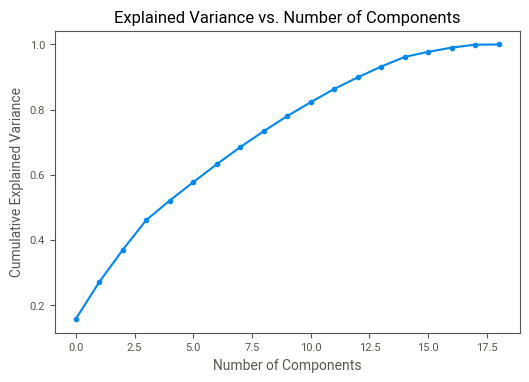

In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df5)


pca = PCA()
pca.fit(df_scaled)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [130]:
threshold = 0.95

num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f"Number of components to retain: {num_components}")

Number of components to retain: 15


In [131]:
df_pca = df5.copy()

In [132]:
X = df5.iloc[:, :11]  
X = pd.concat([X, df5.iloc[:, 12:]], axis=1)  
y = df5.iloc[:, 11]

In [133]:
ss = StandardScaler()
X_pca = df_pca.iloc[:,:11]
X_pca = pd.concat([X, df_pca.iloc[:, 12:]], axis=1)
X_pca = pd.DataFrame(data=ss.fit_transform(X_pca), columns=X_pca.columns)          

In [134]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_pca)
cols = [f'PC{i}' for i in range(1,16)]
X_pca = pd.DataFrame(data=X_pca, columns=cols)
X_pca.shape

(46329, 15)

 Splitting the data

In [135]:
X = df5.iloc[:, :11]  
X = pd.concat([X, df5.iloc[:, 12:]], axis=1)  
y = df5.iloc[:, 11]

X_pca = df_pca.iloc[:, :11]  
X_pca = pd.concat([X, df_pca.iloc[:, 12:]], axis=1)  
y_pca = df_pca.iloc[:, 11]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

Splitted the data into 80:20 ratio

### Model Building

In [138]:
from sklearn.cluster import KMeans

data = df5

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

distortions = []
max_k = 20

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)  


In [139]:
elbow_index = distortions.index(min(distortions))

optimal_k = elbow_index + 1

print(f"Optimal number of clusters (k): {optimal_k}")

Optimal number of clusters (k): 20


In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

In [141]:
knn = KNeighborsClassifier()
svc = SVC()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()
mlp = MLPClassifier()
kmeans = KMeans(n_clusters=20)

### Model training and testing

In [142]:
l = [knn, svc, nb, dt, rf, lr, gb, mlp, kmeans]
d = []
tt = []
verbose = 1 
for x in l:
    t0=time.time()
    x.fit(X_train,y_train)
    t1=time.time()
    train_preds = x.predict(X_train)
    t2=time.time()
    test_preds = x.predict(X_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_train, train_preds)*100).round(2), 'Train', 'No'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(y_test, test_preds)*100).round(2), 'Test', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'No'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'No'])
    
    t0=time.time()
    x.fit(Xpca_train,ypca_train)
    t1=time.time()
    train_preds_pca = x.predict(Xpca_train)
    t2=time.time()
    test_preds_pca = x.predict(Xpca_test)
    t3=time.time()
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_train, train_preds_pca)*100).round(2), 'Train', 'Yes'])
    d.append([str(x)[:str(x).index('(')],(accuracy_score(ypca_test, test_preds_pca)*100).round(2), 'Test', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t1-t0)*1000), 'Training', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t2-t1)*1000), 'Evaluating', 'Yes'])
    tt.append([str(x)[:str(x).index('(')],round((t3-t2)*1000), 'Predicting', 'Yes'])
    if verbose:
        print(str(x)[:str(x).index('(')])
        print('Manual Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(y_train, train_preds))
        print(confusion_matrix(y_train, train_preds),'\n')
        print('\nTest Set\n')
        print(classification_report(y_test, test_preds))
        print(confusion_matrix(y_test, test_preds),'\n')
        print('PCA Dimensionality Reduction')
        print('\nTrain Set\n')
        print(classification_report(ypca_train, train_preds_pca))
        print(confusion_matrix(ypca_train, train_preds_pca),'\n')
        print('\nTest Set\n')
        print(classification_report(ypca_test, test_preds_pca))
        print(confusion_matrix(ypca_test, test_preds_pca),'\n')
        print('--x--x--x--x--x--x--x--x--x--x--x--x--x--\n\n')

KNeighborsClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35268
           1       0.70      0.04      0.07      1795

    accuracy                           0.95     37063
   macro avg       0.82      0.52      0.52     37063
weighted avg       0.94      0.95      0.93     37063

[[35240    28]
 [ 1731    64]] 


Test Set

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8797
           1       0.32      0.02      0.04       469

    accuracy                           0.95      9266
   macro avg       0.64      0.51      0.50      9266
weighted avg       0.92      0.95      0.93      9266

[[8778   19]
 [ 460    9]] 

PCA Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35268
           1       0.69      0.04      0.07      1795

   

GradientBoostingClassifier
Manual Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35268
           1       0.74      0.80      0.77      1795

    accuracy                           0.98     37063
   macro avg       0.86      0.89      0.88     37063
weighted avg       0.98      0.98      0.98     37063

[[34757   511]
 [  353  1442]] 


Test Set

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8797
           1       0.72      0.76      0.74       469

    accuracy                           0.97      9266
   macro avg       0.85      0.87      0.86      9266
weighted avg       0.97      0.97      0.97      9266

[[8660  137]
 [ 112  357]] 

PCA Dimensionality Reduction

Train Set

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     35268
           1       0.74      0.80      0.77      179

              precision    recall  f1-score   support

           0       0.97      0.47      0.63     35268
           1       0.06      0.03      0.04      1795
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [143]:
comp = pd.DataFrame(data=d, columns=['Model', 'Accuracy','Type', 'PCA?'])
comp

,Model,Accuracy,Type,PCA?
0,KNeighborsClassifier,95.25,Train,No
1,KNeighborsClassifier,94.83,Test,No
2,KNeighborsClassifier,95.25,Train,Yes
3,KNeighborsClassifier,94.84,Test,Yes
4,SVC,95.16,Train,No
5,SVC,94.94,Test,No
6,SVC,95.16,Train,Yes
7,SVC,94.94,Test,Yes
8,GaussianNB,95.16,Train,No
9,GaussianNB,94.94,Test,No


### Based on above confusion matrix,classification report and accuracy values : Random Forest Classifier is the best model for predicting RFC (Request for change).